# SMS SPAM DETECTION SYSTEM

### Project Description: SMS Spam Detection

This project aims to create an effective SMS spam detection system using machine learning. The dataset for this project is obtained from Kaggle's SMS Spam Collection Dataset, which initially included columns with unclear names. The primary objectives of the project are to preprocess and clean the data, build and evaluate a classification model, and deploy the solution.

**Project Steps:**
1. **Data Cleaning**: Address missing values and rename columns for clarity.
2. **Exploratory Data Analysis (EDA)**: Analyze and visualize data to understand patterns and characteristics of spam and ham messages.
3. **Text Preprocessing**: Convert text data into a format suitable for machine learning, including tokenization and feature extraction.
4. **Model Building**: Develop and train various machine learning models to classify messages as spam or ham.
5. **Evaluation**: Assess model performance using metrics such as accuracy, precision, recall, and F1-score.
6. **Improvement**: Refine and optimize the model based on evaluation results to enhance performance.
7. **Website**: Create a user-friendly web interface for users to interact with the spam detection system.
8. **Deployment**: Deploy the final model and website to provide real-time spam detection services.

**Dataset Link:**
[SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
sms=pd.read_excel("sms spam.xlsx")
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


###### This dataset comprises 5,572 rows and 5 columns, with column names that are not clearly defined. Additionally, there are noticeable Null values present in the dataset.

## Data Cleaning

In [3]:
# Checking missing values and their percentages
missing_values = sms.isnull().sum()
missing_percentage = (missing_values / len(sms)) * 100

# Creating a DataFrame to display the results
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_data)

            Missing Values  Percentage
v1                       0    0.000000
v2                       0    0.000000
Unnamed: 2            5522   99.102656
Unnamed: 3            5560   99.784637
Unnamed: 4            5566   99.892319


##### Almost all values in columns 'Unnamed: 2', 'Unnamed: 3', and 'Unnamed: 4' are missing, while columns 'v1' and 'v2' have no missing values.

In [4]:
# Removing columns with nearly all values missing
sms = sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Display the updated DataFrame
print(sms.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
# Renaming the columns
sms = sms.rename(columns={'v1': 'Target', 'v2': 'Text'})

# Display the updated DataFrame
print(sms.head())

  Target                                               Text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Transform the 'target' column
sms['Target'] = label_encoder.fit_transform(sms['Target'])

# Display the updated DataFrame
print(sms.head())

   Target                                               Text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


###### In this context, 0 represents 'ham' (legitimate messages), and 1 represents 'spam'.

In [8]:
# Checking for duplicate values
duplicate_count = sms.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 403


In [9]:
# Removing duplicate values
sms = sms.drop_duplicates()

# Display the updated DataFrame and the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {sms.shape[0]}")

Number of rows after removing duplicates: 5169


## Exploratory Data Analysis

In [10]:
# Checking value count for Target
sms['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

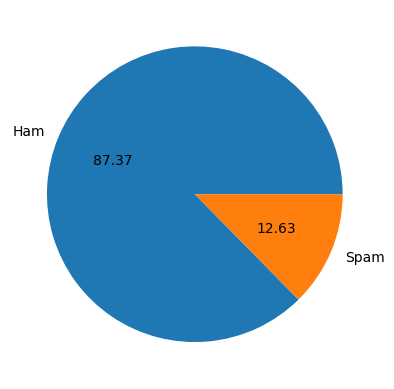

In [11]:
# Creating Pie Chart of value counts for Target
plt.pie(sms['Target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()

###### Our dataset exhibits an imbalance, with significantly more ham messages than spam messages.

In [12]:
import nltk

In [13]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int32 
 1   Text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [14]:
# Identify non-string values in the 'Text' column
non_string_values = sms[sms['Text'].apply(lambda x: not isinstance(x, str))]

print(non_string_values)

      Target Text
1611       0  645


In [15]:
# Converting all values in the 'Text' column to strings
sms['Text'] = sms['Text'].astype(str)

In [16]:
# Applying the len function to calculate the number of characters
sms['Num_Characters']=sms['Text'].apply(len)

In [17]:
sms.head()

,Target,Text,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
# Calculating the number of words
sms['Num_Words']=sms['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
sms.head()

,Target,Text,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
# Calculating the number of sentences
sms['Num_Sentences']=sms['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
sms.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


###### I have generated three new features based on the `Text` column: the number of characters, the number of words, and the number of sentences.

In [22]:
# Display summary statistics for the specified columns
sms[['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.980267,18.453279,1.947185
std,58.239404,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
# Descriptive statistics for 'ham' values (Target = 0)
ham_description = sms[sms['Target'] == 0][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()
print("Descriptive statistics for 'ham' values:")
ham_description

Descriptive statistics for 'ham' values:


,Num_Characters,Num_Words,Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.461913,17.120903,1.799601
std,56.362288,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
# Descriptive statistics for 'spam' values (Target = 1)
spam_description = sms[sms['Target'] == 1][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()
print("\nDescriptive statistics for 'spam' values:")
spam_description


Descriptive statistics for 'spam' values:


,Num_Characters,Num_Words,Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


###### Descriptive statistics for 'ham' values:

Average message length: 70 characters, 17 words, and 1.8 sentences.
Length ranges from 2 to 910 characters, with notable outliers.

###### Descriptive statistics for 'spam' values:

Average message length: 138 characters, 28 words, and 3.0 sentences.
Length ranges from 13 to 224 characters, with fewer outliers compared to 'ham' messages.

###### In short, Ham messages are generally shorter than spam messages, with more outliers in the ham dataset.

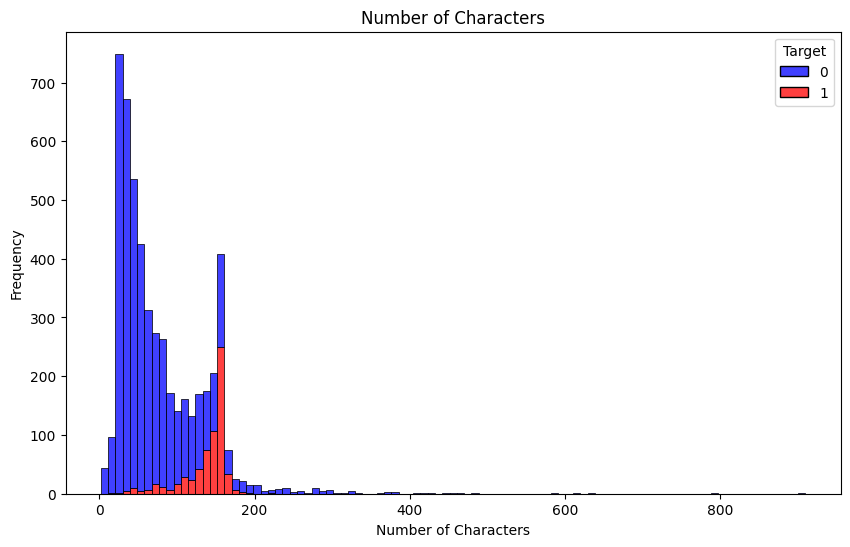

In [25]:
# Plotting for Num_Characters
plt.figure(figsize=(10,6))
sns.histplot(data=sms, x='Num_Characters', hue='Target', multiple='stack', palette={0: 'blue', 1: 'red'})
plt.title('Number of Characters')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

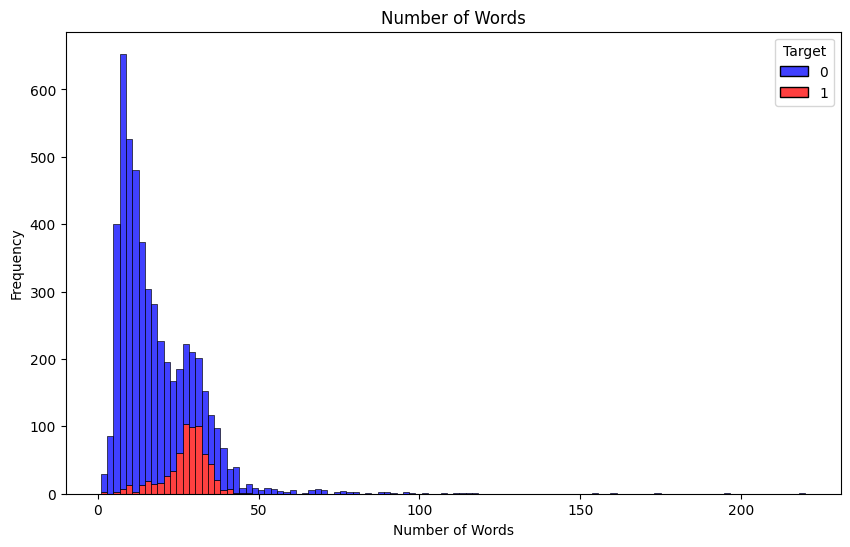

In [26]:
# Plotting for Num_Words
plt.figure(figsize=(10, 6))
sns.histplot(data=sms, x='Num_Words', hue='Target', multiple='stack', palette={0: 'blue', 1: 'red'})
plt.title('Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

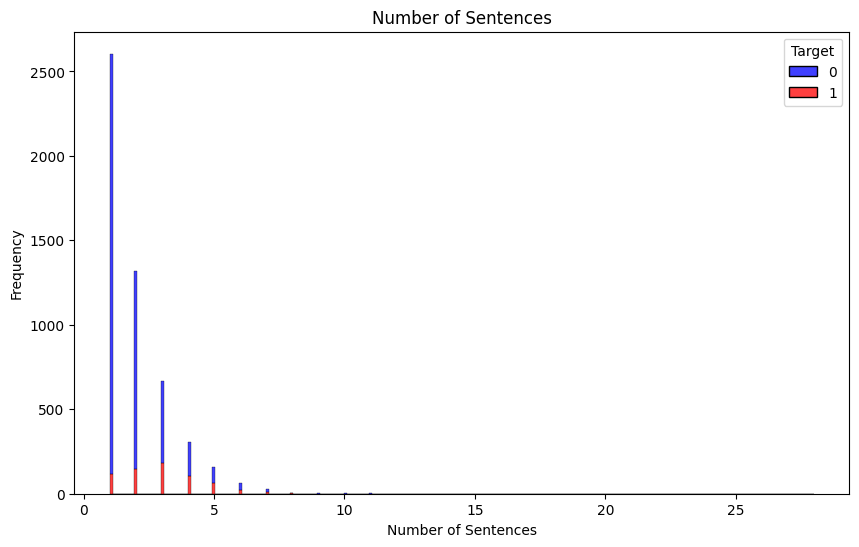

In [27]:
# Plotting for Num_Sentences
plt.figure(figsize=(10, 6))
sns.histplot(data=sms, x='Num_Sentences', hue='Target', multiple='stack', palette={0: 'blue', 1: 'red'})
plt.title('Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.show()

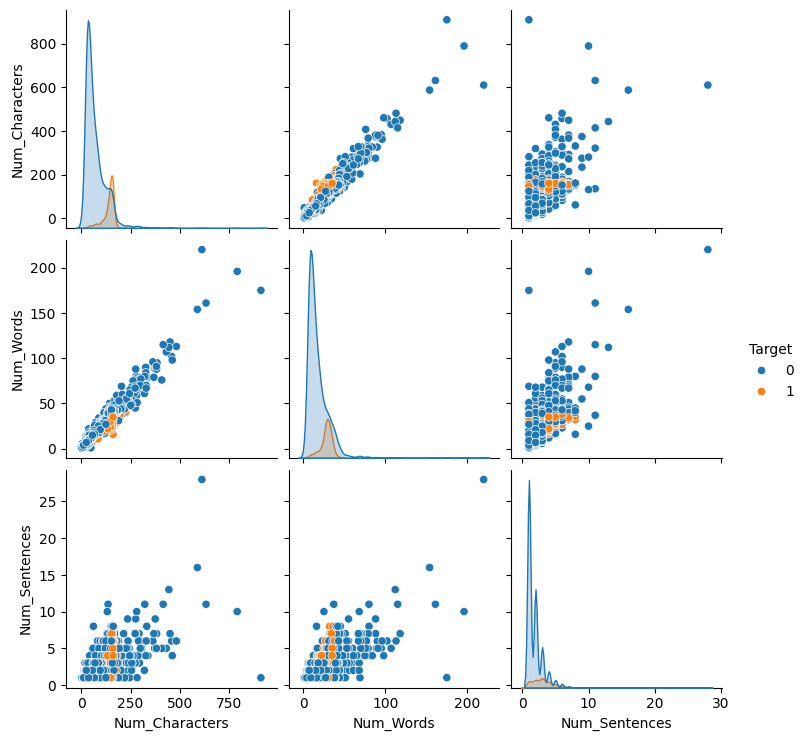

In [28]:
sns.pairplot(data=sms, hue='Target')

<Axes: >

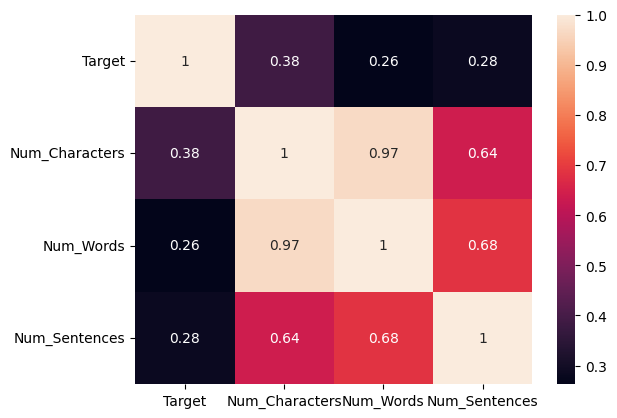

In [29]:
# Creating Heatmap to show Correlation
correlation=sms.corr()
sns.heatmap(correlation, annot=True)

###### The correlation between Target and Num_Characters is indicating a moderate positive relationship. This suggests that spam messages tend to have more characters compared to legitimate messages.

###### Strong multicollinearity exists between Num_Characters and Num_Words, as indicated by their very high correlation coefficient.

###### Moderate multicollinearity is present between Num_Characters and Num_Sentences, and between Num_Words and Num_Sentences.

## Text Preprocessing

In [31]:
# Importing necessary libraries
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initializing the PorterStemmer
ps = PorterStemmer()

# Defining the transform_text function
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    text = nltk.word_tokenize(text)
    
    y = []
    # Removing special characters and keep alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Removing stop words and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Applying stemming
    for i in text:
        y.append(ps.stem(i))
    
    # Return the processed text as a single string
    return " ".join(y)


**Lower Case:** Converts the input text to lowercase.\
**Tokenization:** Splits the text into individual tokens (words).\
**Alphanumeric Filtering:** Keeps only alphanumeric tokens, removing any special characters.\
**Stop Words and Punctuation Removal:** Filters out common stop words and punctuation.\
**Stemming:** Reduces words to their base form using the PorterStemmer.

In [33]:
# Applying the above function on text column
sms['Transformed_Text'] = sms['Text'].apply(transform_text)

In [34]:
sms.head(10)

,Target,Text,Num_Characters,Num_Words,Num_Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='yellow')

In [41]:
# Creating the word cloud for spam messages
spam_wc = wc.generate(sms[sms['Target'] == 1]['Transformed_Text'].str.cat(sep=" "))

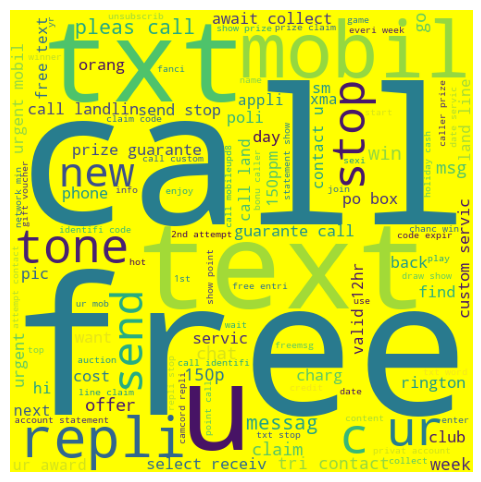

In [42]:
# Plotting the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis('off') 
plt.show()

In [43]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='skyblue')

In [46]:
# Creating the word cloud for ham messages
ham_wc = wc.generate(sms[sms['Target'] == 0]['Transformed_Text'].str.cat(sep=" "))

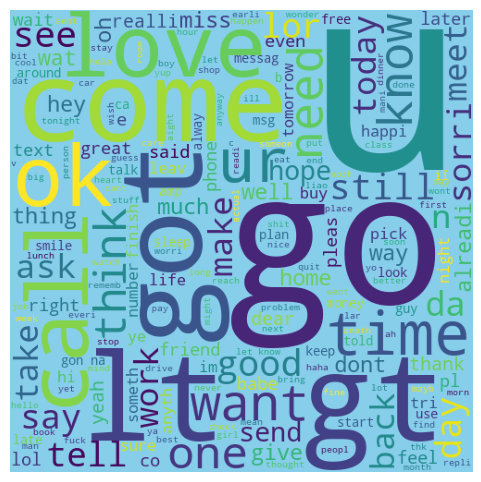

In [47]:
# Plotting the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.axis('off') 
plt.show()

In [48]:
# Initializing an empty list to store words from spam messages
spam_corpus = []

# Loop through each message in the spam category
for msg in sms[sms['Target'] == 1]['Transformed_Text'].tolist():
    # Splitting each message into words and add them to the spam_corpus list
    for word in msg.split():
        spam_corpus.append(word)

# Calculating the total number of words in the spam corpus
len_spam_corpus = len(spam_corpus)

# Print the total number of words in the spam corpus
print(len_spam_corpus)

9939


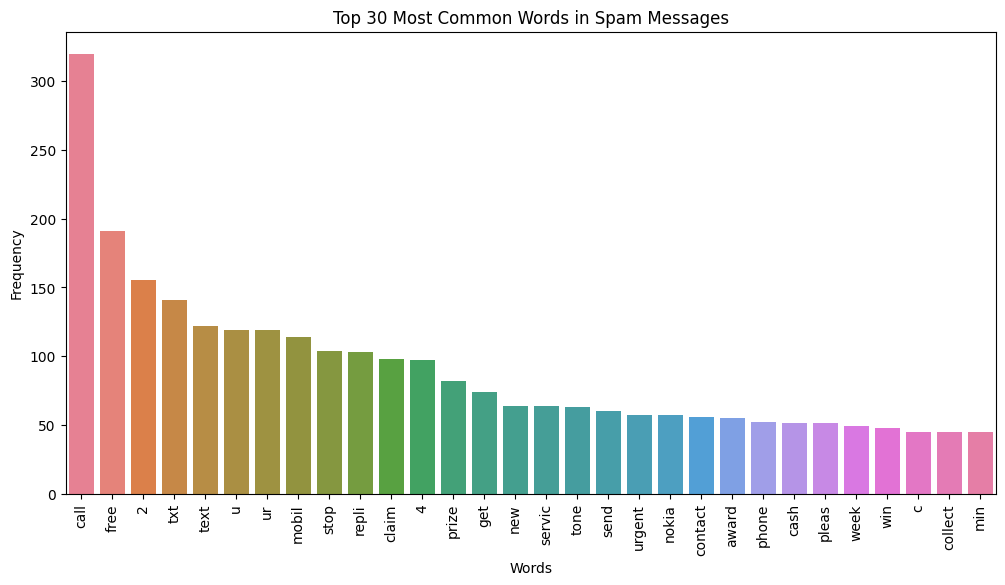

In [51]:
from collections import Counter

# Get the 30 most common words in the spam corpus
spam_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Plot the most common words as a bar plot
plt.figure(figsize=(12,6))
colors = sns.color_palette('husl', len(spam_common_words))
sns.barplot(x=spam_common_words[0], y=spam_common_words[1],palette=colors)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

In [52]:
# Initializing an empty list to store words from ham messages
ham_corpus = []

# Loop through each message in the ham category
for msg in sms[sms['Target'] == 0]['Transformed_Text'].tolist():
    # Splitting each message into words and add them to the ham_corpus list
    for word in msg.split():
        ham_corpus.append(word)

# Calculating the total number of words in the ham corpus
len_ham_corpus = len(ham_corpus)

# Print the total number of words in the ham corpus
print(len_ham_corpus)

35392


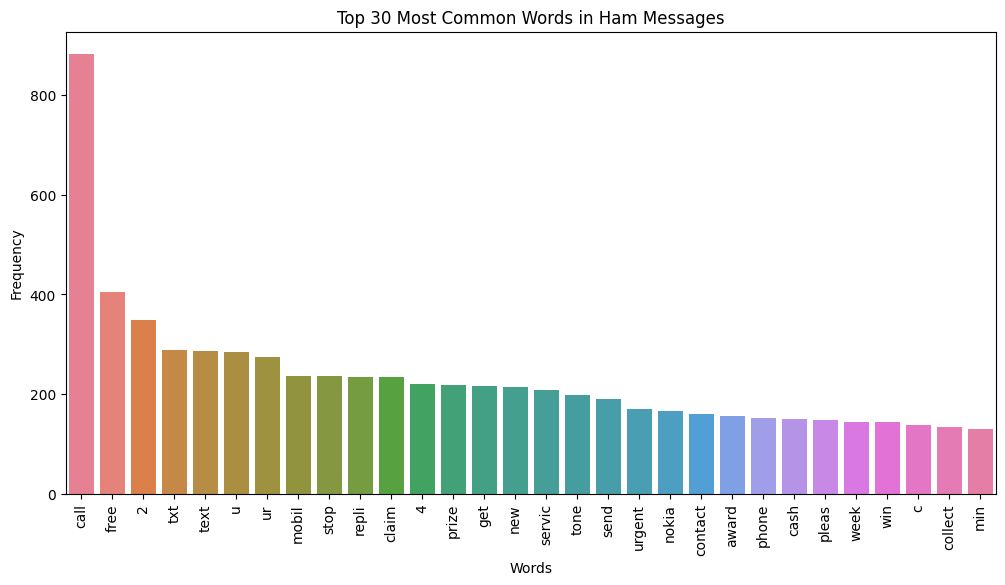

In [53]:
# Get the 30 most common words in the ham corpus
ham_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Plot the most common words as a bar plot
plt.figure(figsize=(12,6))
colors = sns.color_palette('husl', len(ham_common_words))
sns.barplot(x=spam_common_words[0], y=ham_common_words[1],palette=colors)
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

## Model Building and Evaluation

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Initialize the TfidfVectorizer with a max feature limit of 3000
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
# Transforming the 'transformed_text' column into a TF-IDF feature matrix
X = tfidf.fit_transform(sms['Transformed_Text']).toarray()

# Shape of the feature matrix
print(X.shape) 

(5169, 3000)


In [56]:
# Defining the target variable
y = sms['Target'].values

In [57]:
print(y.shape)

(5169,)


In [58]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

In [62]:
# Initializing classifiers with parameters
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [63]:
# Dictionary of classifiers
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb
}

In [64]:
# Function to train classifier and calculate accuracy and precision
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)  # Fit the classifier to the training data
    y_pred = clf.predict(X_test)  # Predict on the test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred)  # Calculate precision
    
    return accuracy, precision

In [65]:
# Lists to store accuracy and precision scores
accuracy_scores = []
precision_scores = []

# Loop through each classifier, train it, and print the results
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For KN
Accuracy - 0.9052224371373307
Precision - 1.0
For NB
Accuracy - 0.971953578336557
Precision - 1.0
For DT
Accuracy - 0.9274661508704062
Precision - 0.8181818181818182
For LR
Accuracy - 0.9574468085106383
Precision - 0.97
For RF
Accuracy - 0.9709864603481625
Precision - 0.9655172413793104
For AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9369369369369369
For BgC
Accuracy - 0.9564796905222437
Precision - 0.8604651162790697
For ETC
Accuracy - 0.9806576402321083
Precision - 0.9836065573770492
For GBDT
Accuracy - 0.9468085106382979
Precision - 0.9278350515463918
For XGB
Accuracy - 0.9661508704061895
Precision - 0.9327731092436975


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [67]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
8,ETC,0.980658,0.983607
0,SVC,0.974855,0.974576
4,LR,0.957447,0.970000
5,RF,0.970986,0.965517
6,AdaBoost,0.960348,0.936937
10,XGB,0.966151,0.932773
9,GBDT,0.946809,0.927835
7,BgC,0.956480,0.860465


###### Among the classifiers tested, the Multinomial Naive Bayes model performed the best, achieving a precision score of 1.0 and an accuracy of 0.971954. In this project, precision is particularly important because it measures the proportion of correctly identified spam messages out of all messages predicted as spam. High precision ensures that the model minimizes false positives, which is crucial for preventing legitimate messages from being incorrectly classified as spam.

In [69]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,ETC,Accuracy,0.980658
3,SVC,Accuracy,0.974855
4,LR,Accuracy,0.957447
5,RF,Accuracy,0.970986
6,AdaBoost,Accuracy,0.960348
7,XGB,Accuracy,0.966151
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.956480


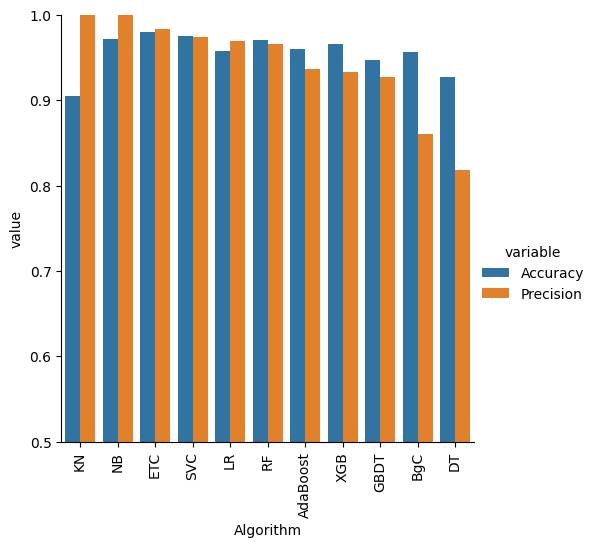

In [71]:
# Creating the cat plot
sns.catplot(x='Algorithm', y='value', 
            hue='variable', data=performance_df1, 
            kind='bar', height=5)

# Set the y-axis limits
plt.ylim(0.5, 1.0)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [72]:
# Saving the MNB model 
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

### Project Summary: SMS Spam Detection

**Objective:**
The goal of this project is to build a robust SMS spam detection system using machine learning techniques. The dataset used for this project is sourced from Kaggle, which initially contained columns with unclear names. The project includes data preprocessing, exploratory data analysis (EDA), model building, and evaluation.

**Steps and Methodologies:**

1. **Data Cleaning:**
   - Loaded the dataset from Kaggle into system as excel workbook.
   - Renamed columns for clarity (`v1` to `target`, `v2` to `text`).
   - Removed unnecessary columns with mostly missing values.

2. **Data Preprocessing:**
   - Applied transformations to the `text` column, including:
     - Converting text to lowercase.
     - Tokenizing text.
     - Removing special characters, stop words, and punctuation.
     - Stemming words.
   - Created additional features: number of characters, words, and sentences.

3. **Exploratory Data Analysis (EDA):**
   - Analyzed the distribution of `Num_Characters`, `Num_Words`, and `Num_Sentences` for both `ham` and `spam` messages.
   - Visualized data using histograms and heatmaps to understand patterns and correlations.

4. **Feature Extraction:**
   - Used `TfidfVectorizer` to convert text data into numerical features.
   - The feature matrix was combined with the number of characters for model training.

5. **Model Building and Evaluation:**
   - Implemented several classifiers: Logistic Regression, SVC, Naive Bayes, Decision Tree, K-Nearest Neighbors, Random Forest, AdaBoost, Bagging, Extra Trees, and Gradient Boosting.
   - Evaluated models based on accuracy and precision, highlighting that Multinomial Naive Bayes achieved the highest precision and competitive accuracy.
   - Precision was prioritized due to its importance in minimizing false positives, ensuring that legitimate messages are not incorrectly labeled as spam.

6. **Visualization:**
   - Plotted performance metrics for each model using bar plots to compare accuracy and precision across different algorithms.
   - Generated word clouds and bar plots of frequently occurring words in spam messages to gain insights into common spam content.

7. **Model Saving:**
   - Saved the trained Naive Bayes model using `pickle` for future use and deployment.

**Key Findings:**
- Multinomial Naive Bayes exhibited the highest precision, making it the most effective model for this task.
- Spam messages generally have more characters, words, and sentences compared to ham messages.
- Visualization and correlation analysis helped understand the data distribution and relationships between features.

**Next Steps:**
- Deploy the model into a production environment for real-time spam detection.
